# Predictive Analytics

Predicting the probability of each customer purchasing a product per each visit

In [1]:
import pandas as pd
import numpy as np
import os
%matplotlib inline
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
px.defaults.template = 'plotly_white'
import pickle
from sklearn.linear_model import LogisticRegression

In [2]:
# code description for most of these are available are available in the descriptive analytics notebook


ss = pickle.load(open('scaler.pkl', 'rb'))
pca = pickle.load(open('pca.pkl', 'rb'))
kmeans_pca = pickle.load(open('kmeans_pca.pkl', 'rb'))

df_purchase = pd.read_csv(os.path.join('data', 'purchase data.csv'))
df_purchase.columns = df_purchase.columns.str.replace(' ', '_')
df_purchase.columns = map(str.lower, df_purchase.columns)
features = df_purchase[['sex', 'marital_status', 'age', 'education', 'income',
       'occupation', 'settlement_size']]
dfpss = ss.transform(features)
dfpss_pca = pca.transform(dfpss)
purchase_segm_kmeans_pca = kmeans_pca.predict(dfpss_pca)
df_purchase['segment'] = purchase_segm_kmeans_pca
#remapping the cluster labels for better interpretation like in the first customer analytics section
df_purchase['segment'] = df_purchase['segment'].map({3:0,0:2, 2:1, 1:3}).map({0:'Well-off',  2:'Standard', 1:'Fewer-Opportunities', 3:'Career-Focused'})


In [3]:
segment_dummies = pd.get_dummies(df_purchase['segment'], prefix='segment')
df_purchase_predictors = pd.concat([df_purchase, segment_dummies], axis=1)

In [4]:
df_purchase_predictors

,id,day,incidence,brand,quantity,last_inc_brand,last_inc_quantity,price_1,price_2,price_3,...,age,education,income,occupation,settlement_size,segment,segment_Career-Focused,segment_Fewer-Opportunities,segment_Standard,segment_Well-off
0,200000001,1,0,0,0,0,0,1.59,1.87,2.01,...,47,1,110866,1,0,Fewer-Opportunities,0,1,0,0
1,200000001,11,0,0,0,0,0,1.51,1.89,1.99,...,47,1,110866,1,0,Fewer-Opportunities,0,1,0,0
2,200000001,12,0,0,0,0,0,1.51,1.89,1.99,...,47,1,110866,1,0,Fewer-Opportunities,0,1,0,0
3,200000001,16,0,0,0,0,0,1.52,1.89,1.98,...,47,1,110866,1,0,Fewer-Opportunities,0,1,0,0
4,200000001,18,0,0,0,0,0,1.52,1.89,1.99,...,47,1,110866,1,0,Fewer-Opportunities,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58688,200000500,703,0,0,0,2,1,1.41,1.85,2.01,...,42,1,120946,1,0,Fewer-Opportunities,0,1,0,0
58689,200000500,710,0,0,0,0,0,1.36,1.84,2.09,...,42,1,120946,1,0,Fewer-Opportunities,0,1,0,0
58690,200000500,717,0,0,0,0,0,1.50,1.80,2.14,...,42,1,120946,1,0,Fewer-Opportunities,0,1,0,0
58691,200000500,722,1,2,3,0,0,1.51,1.82,2.09,...,42,1,120946,1,0,Fewer-Opportunities,0,1,0,0


In [5]:
y = df_purchase_predictors['incidence']

In [6]:

X = pd.DataFrame()

In [7]:
# Reducing the 5 prices to their average
X['mean_price'] = df_purchase_predictors[['price_'+ str(i) for i in range(1,6)]].sum(axis=1)/5

In [8]:
X.head()

,mean_price
0,2.044
1,2.028
2,2.028
3,2.028
4,2.030


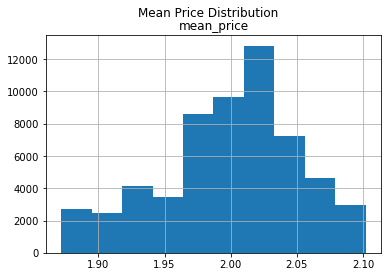

In [9]:
X.hist()
plt.suptitle('Mean Price Distribution');

In [10]:
model_purchase = LogisticRegression(solver='sag')
model_purchase.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='sag', tol=0.0001, verbose=0,
                   warm_start=False)

In [11]:
model_purchase.coef_

array([[-2.34639617]])

As we can expect reducing the price has a positive effect on purchasing

## Calculating Price Elasticity 

Price elasticity of purchase probability is the percentage change in purchase probability in response to a one percent change in the respective aggregate price for the product category.


In [12]:
df_purchase_predictors[['price_'+ str(i) for i in range(1,6)]].min().min()

1.1

In [13]:
df_purchase_predictors[['price_'+ str(i) for i in range(1,6)]].max().max()


2.8

In [14]:
# Creating an array from 1 to 2.99 for the price range.
df_price = pd.DataFrame(np.arange(0.5, 3.5, 0.01))

In [15]:
y_pr = model_purchase.predict_proba(df_price)

In [16]:
# resulting array has two columns: the probability of no purchase, the probability of purchase. the higher the price becomes they increase and decrease. 
y_pr[0:5, :]

array([[0.08196084, 0.91803916],
       [0.08374376, 0.91625624],
       [0.08556184, 0.91443816],
       [0.08741562, 0.91258438],
       [0.08930565, 0.91069435]])

In [17]:
purchase_pro = y_pr[:,1]

In [18]:
# price elasticity: pe
pe = model_purchase.coef_ * df_price[0].values * (1 - purchase_pro)

In [19]:
pe[:, 0:5]

array([[-0.09615631, -0.10021297, -0.10439622, -0.10870919, -0.11315508]])

In [20]:
df_price.rename(columns={0:'price_point'}, inplace=True)

In [21]:
df_price

,price_point
0,0.50
1,0.51
2,0.52
3,0.53
4,0.54
...,...
295,3.45
296,3.46
297,3.47
298,3.48


In [22]:
df_price_elasticities = df_price.copy()

In [23]:
df_price_elasticities['mean_pe'] = pe[0]

In [24]:
df_price_elasticities

,price_point,mean_pe
0,0.50,-0.096156
1,0.51,-0.100213
2,0.52,-0.104396
3,0.53,-0.108709
4,0.54,-0.113155
...,...,...
295,3.45,-8.006642
296,3.46,-8.031884
297,3.47,-8.057092
298,3.48,-8.082265


In [25]:
fig = px.scatter(df_price_elasticities, x='price_point', y='mean_pe',
                 title='Price Elasticity of Purchase Probability',
                 labels={'mean_pe':'Price Elasticity',
                         'price_point':'Price Point'})
fig.update_yaxes(dtick=1)

#### Interpretation  

Price elasticity decreases as price increases and the less likely it will become for people to buy a product.  

Between the range of 0.5 and 1.1, the decrease in the elasticity seems to be slow. After 1.1, it becomes steeper.  

Elasticity values are negative since the model coefficient was negative which indicates the inverse proportionality between price and purchase probability.  


Elasticity measures the percentage in an output variable. In this case this is the purchase probability given a percent change in an input variable which is the price.  

Now if this percent change is greater than 100 percent we say that the output or purchase probability is called elastic. On the other hand for changes less than 100 percent it is inelastic.

In other words if the elasticity has a value smaller than one in absolute terms we say it is inelastic. If it is greater than one we say it is elastic.  

As an example at price point 0.5, an increase of price in 1% will lead to the decrease of purchase probability of -0.096%, this is considered to be inelastic.  At price point 2, an increase of 1% in price will lead to the decrease of -3.53% in the purchase probability and this is considered to be elastic.  

Thus the general recommendation would be to increase the price for inelastic values. This range includes price points from \$0.5 to \$1.25 and increasing the price in this range wouldn't lead to too much decrease in purchase probability.  In prices higher than 1.25 we would gain more if we reduce our price and thus increase our purchase probability. 

## Purchase Elasticities for Different Segments

## Seg 0

In [26]:
# ({0:'Well-off',  2:'Sandard', 1:'Fewer-Opportunities', 3:'Career-Focused'})

In [27]:
df_pa_seg_0 = df_purchase_predictors[df_purchase_predictors['segment'] == 'Well-off']

In [28]:
y = df_pa_seg_0['incidence']
X = pd.DataFrame()
X['mean_price'] = df_pa_seg_0[['price_'+ str(i) for i in range(1,6)]].sum(axis=1)/5

In [29]:
model_incidence_seg_0 = LogisticRegression(solver = 'sag')
model_incidence_seg_0.fit(X,y)
model_incidence_seg_0.coef_
# We observe that the price coefficient for the career focused is -1.24, whereas for the average customer it was -2.35.

array([[-1.24579844]])

In [30]:
y_pr_seg_0 = model_incidence_seg_0.predict_proba(df_price[['price_point']])
purchase_pro_seg_0 = y_pr[:,1]
pe_seg_0 = model_incidence_seg_0.coef_ * df_price.price_point.values * (1 - purchase_pro_seg_0)
df_price_elasticities['pe_segment_0'] = pe_seg_0[0]

## Segment 1

In [31]:
df_pa_seg_1 = df_purchase_predictors[df_purchase_predictors['segment'] == 'Fewer-Opportunities']
y = df_pa_seg_1['incidence']
X = pd.DataFrame()
X['mean_price'] = df_pa_seg_1[['price_'+ str(i) for i in range(1,6)]].sum(axis=1)/5
model_incidence_seg_1 = LogisticRegression(solver = 'sag')
model_incidence_seg_1.fit(X,y)
model_incidence_seg_1.coef_
# We observe that the price coefficient for the few opportunities is -3.4, whereas for the average customer it was -2.35.


array([[-3.64017563]])

In [32]:
y_pr_seg_1 = model_incidence_seg_1.predict_proba(df_price[['price_point']])
purchase_pro_seg_1 = y_pr[:,1]
pe_seg_1 = model_incidence_seg_1.coef_ * df_price.price_point.values * (1 - purchase_pro_seg_1)
df_price_elasticities['pe_segment_1'] = pe_seg_1[0]

## Seg 2

In [33]:
df_pa_seg_2 = df_purchase_predictors[df_purchase_predictors['segment'] == 'Standard']
y = df_pa_seg_2['incidence']
X = pd.DataFrame()
X['mean_price'] = df_pa_seg_2[['price_'+ str(i) for i in range(1,6)]].sum(axis=1)/5
model_incidence_seg_2 = LogisticRegression(solver = 'sag')
model_incidence_seg_2.fit(X,y)
print(model_incidence_seg_2.coef_)
# We observe that the price coefficient for the standard is -1.5, whereas for the average customer it was -2.35.
y_pr_seg_2 = model_incidence_seg_2.predict_proba(df_price[['price_point']])
purchase_pro_seg_2 = y_pr[:,1]
pe_seg_2 = model_incidence_seg_2.coef_ * df_price.price_point.values * (1 - purchase_pro_seg_2)
df_price_elasticities['pe_segment_2'] = pe_seg_2[0]

[[-1.50785851]]


## Seg 3

In [34]:
df_pa_seg_3 = df_purchase_predictors[df_purchase_predictors['segment'] == 'Career-Focused']
y = df_pa_seg_3['incidence']
X = pd.DataFrame()
X['mean_price'] = df_pa_seg_3[['price_'+ str(i) for i in range(1,6)]].sum(axis=1)/5
model_incidence_seg_3 = LogisticRegression(solver = 'sag')
model_incidence_seg_3.fit(X,y)
print(model_incidence_seg_3.coef_)
# We observe that the price coefficient for the career-focused is -1.7 , whereas for the average customer it was -2.35.
y_pr_seg_3 = model_incidence_seg_3.predict_proba(df_price[['price_point']])
purchase_pro_seg_3 = y_pr[:,1]
pe_seg_3 = model_incidence_seg_3.coef_ * df_price.price_point.values * (1 - purchase_pro_seg_3)
df_price_elasticities['pe_segment_3'] = pe_seg_3[0]

[[-1.71180716]]


In [35]:
df_price_elasticities

,price_point,mean_pe,pe_segment_0,pe_segment_1,pe_segment_2,pe_segment_3
0,0.50,-0.096156,-0.051053,-0.149176,-0.061793,-0.070151
1,0.51,-0.100213,-0.053207,-0.155469,-0.064400,-0.073110
2,0.52,-0.104396,-0.055428,-0.161959,-0.067088,-0.076162
3,0.53,-0.108709,-0.057718,-0.168650,-0.069860,-0.079309
4,0.54,-0.113155,-0.060079,-0.175548,-0.072717,-0.082552
...,...,...,...,...,...,...
295,3.45,-8.006642,-4.251056,-12.421424,-5.145287,-5.841224
296,3.46,-8.031884,-4.264458,-12.460585,-5.161509,-5.859640
297,3.47,-8.057092,-4.277842,-12.499692,-5.177708,-5.878030
298,3.48,-8.082265,-4.291208,-12.538746,-5.193885,-5.896396


In [36]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=df_price_elasticities.price_point, y=df_price_elasticities.mean_pe,
                    mode='lines',
                    name='AVG PE'))
fig.add_trace(go.Scatter(x=df_price_elasticities.price_point, y=df_price_elasticities.pe_segment_0,
                    mode='lines',
                    name='Well-off PE'))
fig.add_trace(go.Scatter(x=df_price_elasticities.price_point, y=df_price_elasticities.pe_segment_1,
                    mode='lines',
                    name='Fewer-Opportunitites PE'))
fig.add_trace(go.Scatter(x=df_price_elasticities.price_point, y=df_price_elasticities.pe_segment_2,
                    mode='lines',
                    name='Standard PE'))
fig.add_trace(go.Scatter(x=df_price_elasticities.price_point, y=df_price_elasticities.pe_segment_3,
                    mode='lines',
                    name='Career-Focused PE'))
fig.update_yaxes(dtick=1)
fig.update_layout(height=600, width=800, 
                  title='Price Elasticity of Purchase Probability',
                  template='plotly_white')
fig.update_xaxes(title='Price Point')
fig.update_yaxes(title='Price Elasticity')
fig.show()


### Interpretation  

We observe that the Well-off segment are the least elastic when compared to the rest. So, their purchase probability elasticity is not as affected by price.

Fewer-Opportunitties is the most elastic and price sensitive one. This means with the increase of price they become elastic much more faster. They become elastic at $1.07 yet the average PE was $1.25.

The price elasticities for the Standard segment seem to differ across price range. This may be due to the fact that the standard segment is least homogenous, which we discovered during our descriptive analysis. It may be that the customers in this segment have different shopping habbits, which is why their customers start with being more elastic than average but then shift to being more inelastic than the average customer and indeed the Career-focused segment.


# Comparing Price Elasticity with and without Promotion

## Purchase Probability with Promotion Feature

In [37]:
y = df_purchase_predictors['incidence']
X = pd.DataFrame()
X['mean_price'] = df_purchase_predictors[['price_'+ str(i) for i in range(1,6)]].sum(axis=1)/5
X['mean_promotion'] = df_purchase_predictors[['promotion_'+ str(i) for i in range(1,6)]].sum(axis=1)/5

In [38]:
model_incidence_promotion = LogisticRegression(solver='sag')
model_incidence_promotion.fit(X, y)
dict(zip(model_incidence_promotion.coef_[0], X.columns)) #coefficient

{-1.4939450416735471: 'mean_price', 0.5614932500831226: 'mean_promotion'}

The coefficients show that with the decrease of the price, purchase probability increases.  
Also with the increase of the promotion, purchase probability increases.

## Price Elasticity with Promotion

In [39]:
df_price_elasticities

,price_point,mean_pe,pe_segment_0,pe_segment_1,pe_segment_2,pe_segment_3
0,0.50,-0.096156,-0.051053,-0.149176,-0.061793,-0.070151
1,0.51,-0.100213,-0.053207,-0.155469,-0.064400,-0.073110
2,0.52,-0.104396,-0.055428,-0.161959,-0.067088,-0.076162
3,0.53,-0.108709,-0.057718,-0.168650,-0.069860,-0.079309
4,0.54,-0.113155,-0.060079,-0.175548,-0.072717,-0.082552
...,...,...,...,...,...,...
295,3.45,-8.006642,-4.251056,-12.421424,-5.145287,-5.841224
296,3.46,-8.031884,-4.264458,-12.460585,-5.161509,-5.859640
297,3.47,-8.057092,-4.277842,-12.499692,-5.177708,-5.878030
298,3.48,-8.082265,-4.291208,-12.538746,-5.193885,-5.896396


In [40]:
df_price

,price_point
0,0.50
1,0.51
2,0.52
3,0.53
4,0.54
...,...
295,3.45
296,3.46
297,3.47
298,3.48


In [41]:
X = df_price.copy()
X['promotion'] = 1

In [42]:
Y = model_incidence_promotion.predict_proba(X)

In [43]:
promo = Y[:, 1] # probabilities of promotion
price_elasticity_promo = (model_incidence_promotion.coef_[:, 0] * df_price.price_point) * (1 - promo)

In [44]:
df_price_elasticities['Elasticity_with_Promotion'] = price_elasticity_promo
df_price_elasticities

,price_point,mean_pe,pe_segment_0,pe_segment_1,pe_segment_2,pe_segment_3,Elasticity_with_Promotion
0,0.50,-0.096156,-0.051053,-0.149176,-0.061793,-0.070151,-0.125735
1,0.51,-0.100213,-0.053207,-0.155469,-0.064400,-0.073110,-0.129851
2,0.52,-0.104396,-0.055428,-0.161959,-0.067088,-0.076162,-0.134046
3,0.53,-0.108709,-0.057718,-0.168650,-0.069860,-0.079309,-0.138321
4,0.54,-0.113155,-0.060079,-0.175548,-0.072717,-0.082552,-0.142677
...,...,...,...,...,...,...,...
295,3.45,-8.006642,-4.251056,-12.421424,-5.145287,-5.841224,-4.861318
296,3.46,-8.031884,-4.264458,-12.460585,-5.161509,-5.859640,-4.879520
297,3.47,-8.057092,-4.277842,-12.499692,-5.177708,-5.878030,-4.897690
298,3.48,-8.082265,-4.291208,-12.538746,-5.193885,-5.896396,-4.915830


## Price Elasticity without Promotion

In [45]:

X = df_price.copy()
X['promotion'] = 0

Y = model_incidence_promotion.predict_proba(X)
no_promo = Y[: , 1]
price_elasticity_no_promo = model_incidence_promotion.coef_[:, 0] * df_price.price_point *(1- no_promo)
df_price_elasticities['Elasticity_without_Promotion'] = price_elasticity_no_promo

In [46]:
df_price_elasticities

,price_point,mean_pe,pe_segment_0,pe_segment_1,pe_segment_2,pe_segment_3,Elasticity_with_Promotion,Elasticity_without_Promotion
0,0.50,-0.096156,-0.051053,-0.149176,-0.061793,-0.070151,-0.125735,-0.195643
1,0.51,-0.100213,-0.053207,-0.155469,-0.064400,-0.073110,-0.129851,-0.201764
2,0.52,-0.104396,-0.055428,-0.161959,-0.067088,-0.076162,-0.134046,-0.207988
3,0.53,-0.108709,-0.057718,-0.168650,-0.069860,-0.079309,-0.138321,-0.214314
4,0.54,-0.113155,-0.060079,-0.175548,-0.072717,-0.082552,-0.142677,-0.220745
...,...,...,...,...,...,...,...,...
295,3.45,-8.006642,-4.251056,-12.421424,-5.145287,-5.841224,-4.861318,-4.982937
296,3.46,-8.031884,-4.264458,-12.460585,-5.161509,-5.859640,-4.879520,-4.999842
297,3.47,-8.057092,-4.277842,-12.499692,-5.177708,-5.878030,-4.897690,-5.016728
298,3.48,-8.082265,-4.291208,-12.538746,-5.193885,-5.896396,-4.915830,-5.033594


In [47]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=df_price_elasticities.price_point, y=df_price_elasticities.Elasticity_with_Promotion,
                    mode='lines',
                    name='With Promotion PE'))
fig.add_trace(go.Scatter(x=df_price_elasticities.price_point, y=df_price_elasticities.Elasticity_without_Promotion,
                    mode='lines',
                    name='Without Promotion PE'))

fig.update_yaxes(dtick=1)
fig.update_layout(height=600, width=800, 
                  title='Price Elasticity of Purchase Probability with and without Promotion',
                  template='plotly_white')
fig.update_xaxes(title='Price Point')
fig.update_yaxes(title='Price Elasticity')
fig.show()


#### Interpretation

These two lines represent the elasticity of purchase probability given maximum and given minimum promotional activity.

This graph here tells us that the elasticity curve with promotion sits above its respective no promotion counterpart for the entire price range.

Inelasticity for no promotion ends at \$1.27 while for promotion at \$1.46.

That's a difference of almost 20 cents.

So if a product has a regular price of one point thirty dollars the purchase probability is elastic. However if a product cost one point fifty dollars on the regular and its price is reduced to the aforementioned one point thirty dollars during a promotion then our analysis says that purchase probability is still inelastic at this point.

This may sound trivial but it is not. People are more willing to buy products at promotional prices be it because of the large discount signs in some stores or just because psychologically people feel they're getting a bargain. In any case **customers are less price sensitive to similar price changes when there are promotion activities**.  

In other words it pays off to offer discounts.

According to this model if we could incorporate it, it would be more beneficial to have a higher original price and constant promotion rather than a lower original price.

# Modeling Brand Choice

In [48]:
df_purchase

,id,day,incidence,brand,quantity,last_inc_brand,last_inc_quantity,price_1,price_2,price_3,...,promotion_4,promotion_5,sex,marital_status,age,education,income,occupation,settlement_size,segment
0,200000001,1,0,0,0,0,0,1.59,1.87,2.01,...,0,0,0,0,47,1,110866,1,0,Fewer-Opportunities
1,200000001,11,0,0,0,0,0,1.51,1.89,1.99,...,0,0,0,0,47,1,110866,1,0,Fewer-Opportunities
2,200000001,12,0,0,0,0,0,1.51,1.89,1.99,...,0,0,0,0,47,1,110866,1,0,Fewer-Opportunities
3,200000001,16,0,0,0,0,0,1.52,1.89,1.98,...,0,0,0,0,47,1,110866,1,0,Fewer-Opportunities
4,200000001,18,0,0,0,0,0,1.52,1.89,1.99,...,0,0,0,0,47,1,110866,1,0,Fewer-Opportunities
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58688,200000500,703,0,0,0,2,1,1.41,1.85,2.01,...,0,0,0,0,42,1,120946,1,0,Fewer-Opportunities
58689,200000500,710,0,0,0,0,0,1.36,1.84,2.09,...,0,0,0,0,42,1,120946,1,0,Fewer-Opportunities
58690,200000500,717,0,0,0,0,0,1.50,1.80,2.14,...,0,0,0,0,42,1,120946,1,0,Fewer-Opportunities
58691,200000500,722,1,2,3,0,0,1.51,1.82,2.09,...,0,0,0,0,42,1,120946,1,0,Fewer-Opportunities
